### Import

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from sklearn.metrics import classification_report
import pickle

In [2]:
var_df = pd.read_csv('resources/var_tf_idf.csv')
var_df

,abus,act,actual,also,alway,amp,andr,anoth,anyon,anyth,...,woman,women,word,work,world,would,wrong,ye,yeah,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.29981,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.251633,0.0,0.000000,...,0.0,0.00000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.148384,...,0.0,0.00000,0.00000,0.160095,0.0,0.0,0.0,0.0,0.0,0.0
47234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.138547,0.0,0.000000,...,0.0,0.11122,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
47235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
47236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.00000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
cleaned_df_og = pd.read_csv('resources/cleaned_tweets.csv')
cleaned_df_og


,cleaned_text,cyberbullying_type
0,word katandandr food crapilici mkr,not_cyberbullying
1,aussietv white mkr theblock imacelebrityau tod...,not_cyberbullying
2,xochitlsuckkk classi whore red velvet cupcak,not_cyberbullying
3,jason gio meh thank head concern anoth angri d...,not_cyberbullying
4,rudhoeenglish isi account pretend kurdish like...,not_cyberbullying
...,...,...
47233,black ppl expect anyth depend yet free partici...,ethnicity
47234,turner withhold disappoint call court abomin c...,ethnicity
47235,swear god dumb nigger bitch got bleach hair re...,ethnicity
47236,yea fuck therealexel your nigger fuck unfollow...,ethnicity


### Split train test data

In [4]:
X_df = var_df
y_df = cleaned_df_og['cyberbullying_type']
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.20, stratify=y_df, random_state=1234)

In [5]:
X_train

,abus,act,actual,also,alway,amp,andr,anoth,anyon,anyth,...,woman,women,word,work,world,would,wrong,ye,yeah,year
30803,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
23139,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
32539,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.158652
30895,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
6714,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46382,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
252,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
43880,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
46178,0.0,0.0,0.0,0.0,0.223313,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.239074,0.0,0.0,0.000000


### KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_list = []
for n_neighbors in range(1, 11):
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    test_pred = knn_model.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, test_pred))

c:\Users\NOHP\anaconda3\envs\SE_411\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\NOHP\anaconda3\envs\SE_411\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


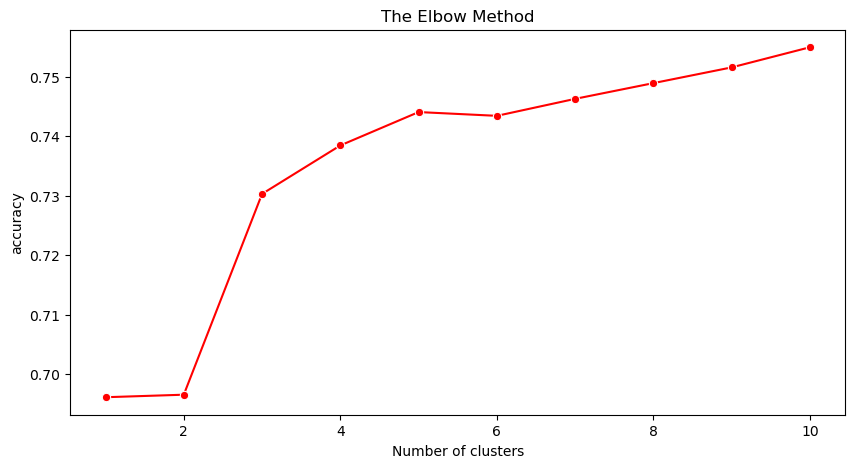

In [7]:
# Elbow Method to find optimal k
plt.figure(figsize=(10,5))
sns.lineplot(x=range(1, 11),y=accuracy_list,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('accuracy')
plt.show()

In [8]:
kneedle_knn = KneeLocator(x=range(1, 11),y=accuracy_list, S=1.0, curve="concave", direction="increasing")
kneedle_knn.knee

4

In [9]:
knn_model = KNeighborsClassifier(n_neighbors=kneedle_knn.knee)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [10]:
test_pred_knn = knn_model.predict(X_test)
accuracy_score(y_test, test_pred_knn)

0.73846316680779

In [30]:
print(classification_report(y_test, test_pred_knn))

                     precision    recall  f1-score   support

                age       0.94      0.86      0.90      1577
          ethnicity       0.97      0.95      0.96      1567
             gender       0.80      0.78      0.79      1579
  not_cyberbullying       0.45      0.53      0.49      1579
other_cyberbullying       0.45      0.49      0.47      1552
           religion       0.94      0.82      0.88      1594

           accuracy                           0.74      9448
          macro avg       0.76      0.74      0.75      9448
       weighted avg       0.76      0.74      0.75      9448



In [36]:
pickle.dump(knn_model, open('resources/knn_model.pkl', 'wb'))

### Decision Tree Classifier

In [22]:
# from sklearn.ensemble import RandomForestClassifier
# rfc_model = RandomForestClassifier()
# rfc_model.fit(X_train, y_train)

# test_pred_rfc = rfc_model.predict(X_test)
# accuracy_score(y_test, test_pred_rfc)

0.7897967823878069

In [11]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
test_pred_dtc = dtc_model.predict(X_test)
accuracy_score(y_test, test_pred_dtc)

0.7660880609652837

In [29]:
print(classification_report(y_test, test_pred_dtc))

                     precision    recall  f1-score   support

                age       0.97      0.96      0.97      1577
          ethnicity       0.97      0.97      0.97      1567
             gender       0.82      0.79      0.81      1579
  not_cyberbullying       0.45      0.44      0.45      1579
other_cyberbullying       0.47      0.51      0.49      1552
           religion       0.93      0.91      0.92      1594

           accuracy                           0.77      9448
          macro avg       0.77      0.77      0.77      9448
       weighted avg       0.77      0.77      0.77      9448



In [35]:
pickle.dump(dtc_model, open('resources/dtc_model.pkl', 'wb'))

### Naive Bayes

In [13]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)

BernoulliNB()

In [14]:
test_pred_clf = clf.predict(X_test)
accuracy_score(y_test, test_pred_clf)

0.7825994919559696

In [28]:
print(classification_report(y_test, test_pred_clf))

                     precision    recall  f1-score   support

                age       0.97      0.98      0.97      1577
          ethnicity       0.96      0.91      0.94      1567
             gender       0.91      0.71      0.80      1579
  not_cyberbullying       0.52      0.58      0.55      1579
other_cyberbullying       0.53      0.62      0.57      1552
           religion       0.91      0.90      0.91      1594

           accuracy                           0.78      9448
          macro avg       0.80      0.78      0.79      9448
       weighted avg       0.80      0.78      0.79      9448



In [34]:
pickle.dump(clf, open('resources/nb_model.pkl', 'wb'))

### SVM

In [15]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

SVC()

In [16]:
test_pred_svm = svm_model.predict(X_test)
accuracy_score(y_test, test_pred_svm)

0.8174216765453006

In [27]:
print(classification_report(y_test, test_pred_svm))

                     precision    recall  f1-score   support

                age       0.97      0.97      0.97      1577
          ethnicity       0.98      0.99      0.98      1567
             gender       0.90      0.81      0.85      1579
  not_cyberbullying       0.63      0.43      0.51      1579
other_cyberbullying       0.54      0.79      0.64      1552
           religion       0.96      0.92      0.94      1594

           accuracy                           0.82      9448
          macro avg       0.83      0.82      0.82      9448
       weighted avg       0.83      0.82      0.82      9448



In [32]:
pickle.dump(svm_model, open('resources/svm_model.pkl', 'wb'))